### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
data = pd.read_csv(r"C:\Users\Windows\Downloads\creditcard.csv")

In [3]:
data.head() #Display the first 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.columns #All columns of dataset

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.info() #Information about the dataset like number of null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.dtypes #Return the data types of each columns 

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
data.isnull().sum() #Function return the total number of null values for each columns

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.duplicated().sum() #Returns total number of duplicates rows of our dataset

1081

In [9]:
data = data.drop_duplicates(keep='first') #Keep the first rows and drop the duplicates rows

In [10]:
data.duplicated().any() #Check for is still duplicates values are there or not

False

In [11]:
data = data.drop("Time",axis=1) #Drop the time columns, for this model time columns are not importance

In [12]:
data.describe() #Function display the count,mean,std,min,max and quartiles values

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


### Feature selection

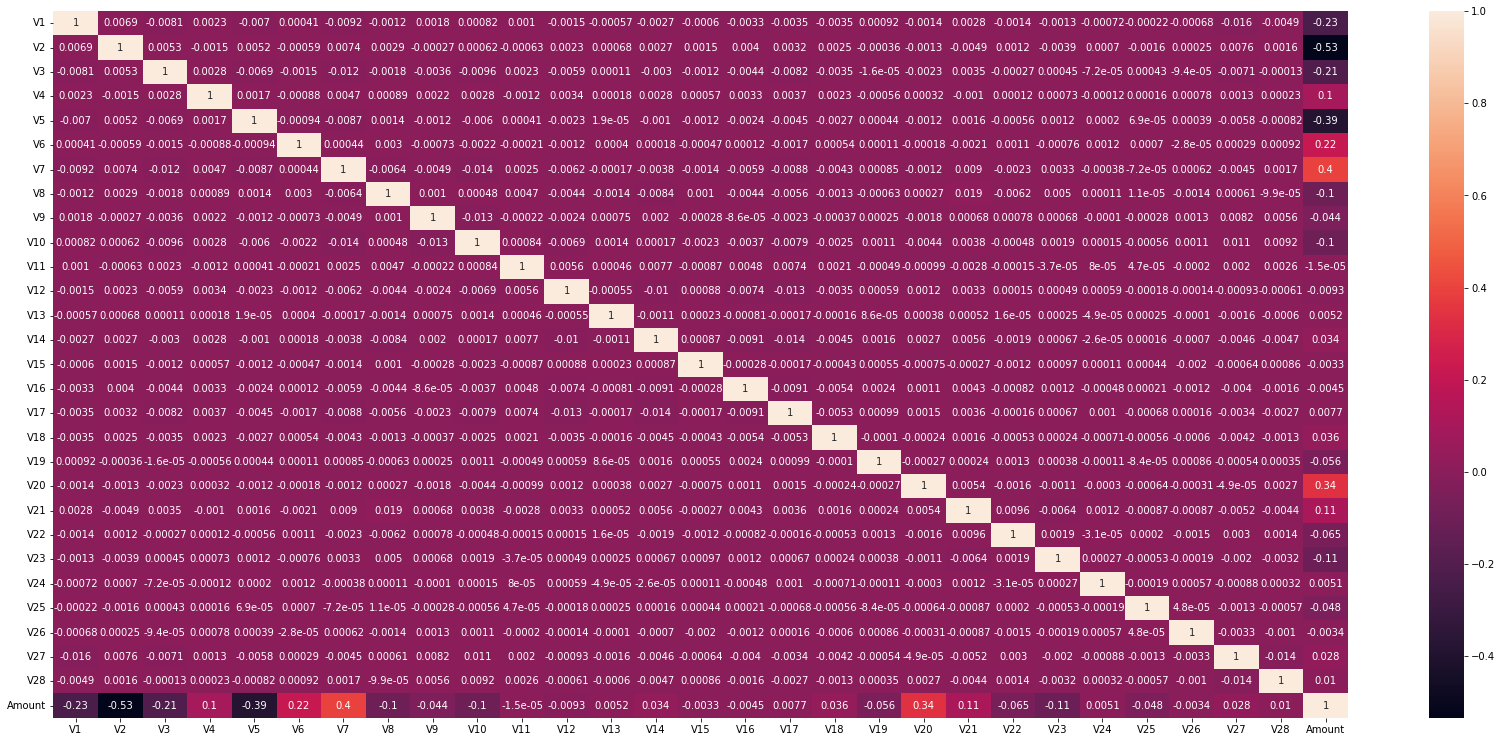

In [13]:
plt.figure(figsize=(29,13))
cor = data.drop("Class",axis=1).corr()
sns.heatmap(cor,annot = True)
plt.show()

In [14]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [15]:
corr_fea = correlation(data.drop("Class",axis=1),0.8)

In [16]:
print(corr_fea)

set()


#### By this correlation we give threshold value 0.8 and we trying to find is any columns are correlated with each other,if correlated then we drop any of this


In [17]:
# sns.pairplot(data,hue='Class')
# plt.show()

### import the dataset, here x is independent and y represented as dependent variable

In [18]:
x = data.drop("Class",axis=1)
y = data['Class']

### Splitting the dataset into the Training set and Test set

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(226980, 29)
(56746, 29)
(226980,)
(56746,)


### Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [22]:
print(x_train)

[[-1.52486886 -2.60108307 -0.63861983 ... -1.52001278  0.46879698
   6.81964163]
 [ 0.98194815 -0.44103132 -0.65057422 ... -0.13685051 -0.16174492
  -0.07543947]
 [-1.50511869  1.67460693 -0.51395191 ...  0.69876314  0.41873435
  -0.30310959]
 ...
 [-1.20916685 -1.03264268  0.97762092 ... -0.02515349 -0.81984975
   0.31359872]
 [ 1.03624832 -0.14261393 -0.7015563  ... -0.14804931 -0.25911008
  -0.35149104]
 [ 0.40330346 -0.60772486  0.60369431 ...  0.01825999  0.01229452
   0.07371942]]


### Logistic Regression

### Training the Logistic Regression model on the Training set

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear',random_state = 0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

### Predicting the Test set results

In [24]:
log_y_pred = classifier.predict(x_test)

### Making the Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, log_y_pred)
print(cm)

[[56649    10]
 [   39    48]]


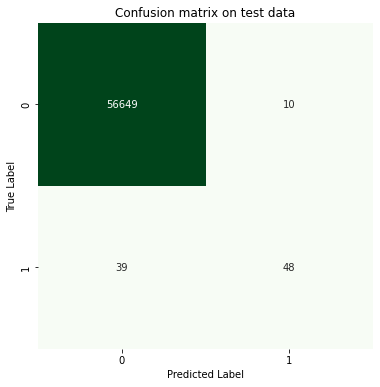

In [26]:
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on test data')
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Computing the accuracy with k-Fold Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 99.92 %


In [61]:
from sklearn.metrics import accuracy_score
acc_score_log = accuracy_score(y_test,log_y_pred)
print(acc_score_log)

0.9991365030134283


### Training the K-NN model on the Training set

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [29]:
knn_y_pred = classifier.predict(x_test)

### Making the Confusion Matrix

In [30]:
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, knn_y_pred)
print(cm)

[[56651     8]
 [   24    63]]


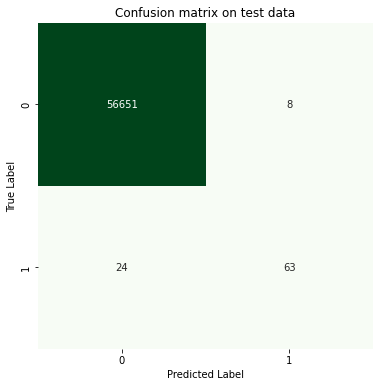

In [31]:
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on test data')
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [32]:
acc_score = accuracy_score(y_test, knn_y_pred)

In [33]:
print(f"Accuracy score by KNN model is: {acc_score}")

Accuracy score by KNN model is: 0.9994360836006062


#### Training the Kernel SVM model on the Training set

In [34]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

### Predicting the Test set results

In [35]:
svm_y_pred = classifier.predict(x_test)

### confusion matrix

In [36]:
cm = confusion_matrix(y_test, svm_y_pred)
print(cm)


[[56655     4]
 [   30    57]]


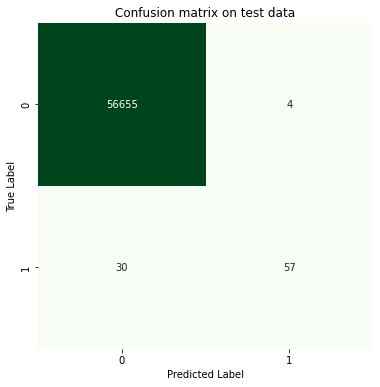

In [37]:
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on test data')
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [38]:
acc_score_svm = accuracy_score(y_test, svm_y_pred)

In [39]:
print(f"Accuracy score by KNN model is: {acc_score_svm}")

Accuracy score by KNN model is: 0.9994008388256441


#### Training the Naive Bayes model on the Training set

In [40]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

### Predicting the Test set results

In [41]:
naive_y_pred = classifier.predict(x_test)

### Confusion matrix

In [42]:
cm = confusion_matrix(y_test, naive_y_pred)
print(cm)

[[55405  1254]
 [   16    71]]


In [43]:
acc_score_naive = accuracy_score(y_test, naive_y_pred)

In [44]:
print(f"Accuracy score by KNN model is: {acc_score_naive}")

Accuracy score by KNN model is: 0.977619567899059


### Training the Decision Tree Regression model on training dataset

In [45]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [46]:
dtr_y_pred = regressor.predict(x_test)

In [47]:
dtr_cm = confusion_matrix(y_test, naive_y_pred)
print(dtr_cm)

[[55405  1254]
 [   16    71]]


In [51]:
dtr_acc =accuracy_score(y_test,dtr_y_pred)
print(f"Accuracy score by DTR is: {dtr_acc}")

Accuracy score by DTR is: 0.9992951045007578


In [62]:
mylist=[]
mylist2=[]
mylist.append(acc_score_log)
mylist2.append("Logistic Regression")
mylist.append(acc_score)
mylist2.append("KNN")
mylist.append(acc_score_svm)
mylist2.append("SVM")
mylist.append(acc_score_naive)
mylist2.append("Naive Bayes")
mylist.append(dtr_acc)
mylist2.append("DTR")

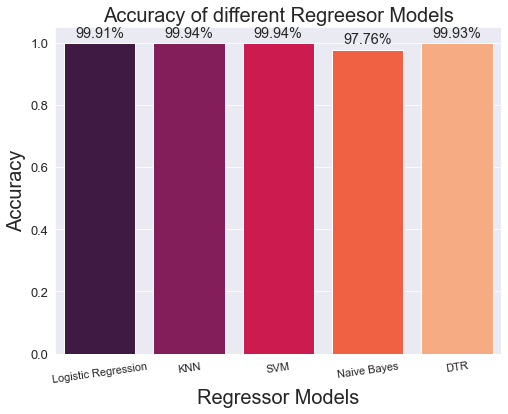

In [63]:
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Regressor Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Regreesor Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

##### Visualization of all model that are applied in this dataset, by bar chart